In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
# import wget

# link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
# wget.download(link)

'traffic-signs-data.zip'

In [7]:
import os
import pickle

base_dir = r"/home/ubuntu-thanhdt/Documents/Deep_Learning/AI-Learning-Project/Neural Networks/Convolution Neural Networks/trafic sign prediction/data"

def load_pickle(filename):
    with open(os.path.join(base_dir, filename), 'rb') as f:
        return pickle.load(f)

train = load_pickle("train.p")
valid = load_pickle("valid.p")
test = load_pickle("test.p")

In [8]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [9]:
trainX = train["features"]
trainY = train["labels"]
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)
testY = lb.fit_transform(testY)

trainX, trainY = shuffle(trainX, trainY)

In [10]:
width = 32
height = 32
classes = 43
shape = (width, height, 3)

In [11]:
#CNN - VGG 16
model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())

# Hidden Layers
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

# Output Layers
model.add(Dense(classes))
model.add(Activation("softmax"))

/home/ubuntu-thanhdt/miniconda3/envs/DL_GPU/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749231193.935001    4140 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2142 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [13]:
# generate more image
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

# specification trainning model
learning_rate = 0.01
epochs = 10
batch_size = 64

# optimizer : SGD: Sequence Gradient Descent
opt = SGD(learning_rate=learning_rate, momentum=0.9)

# compile model (optimizer, loss function, score)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
print("Start training")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=batch_size), 
    validation_data=(validX, validY), 
    steps_per_epoch=trainX.shape[0]//batch_size, 
    epochs=epochs, 
    verbose=1)

Start training
Epoch 1/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9118 - val_loss: 0.4092
Epoch 2/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9844 - loss: 0.0453 - val_accuracy: 0.9127 - val_loss: 0.4082
Epoch 3/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9020 - val_loss: 0.5058
Epoch 4/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 0.9011 - val_loss: 0.5108
Epoch 5/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9952 - loss: 0.0174 - val_accuracy: 0.9079 - val_loss: 0.4752
Epoch 6/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.9066 - val_loss: 0.4746
Epoch 7/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9954 - loss: 0.0144 - val_accuracy: 0.9161 - val_loss: 0.4288
Epoch 8/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9688 - 

In [32]:
model.save("traffic_sign_predict.h5")

In [33]:
saved_model = tf.keras.models.load_model("traffic_sign_predict.h5")

result = saved_model.predict(testX[50:51])
final = np.argmax(result)
final = classNames[final]
final

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


'Dangerous curve to the right'

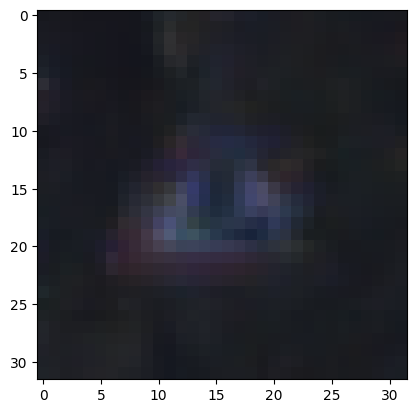

In [34]:
plt.imshow(test["features"][50])